<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
focus = 'Lung Cancer'

In [67]:
network = pd.read_csv('data/cell_lines_corr-above0-5-0-313.net', sep='\t')

In [68]:
network.shape

(372, 3)

In [69]:
nodes = pd.read_csv('data/cell_lines_corr-above0-5-0-313.nodes', sep='\t')

In [70]:
focus_IDs = list(nodes[nodes['Primary Disease']==focus]['Node_ID'])

In [71]:
cancer_lookup = dict(zip(nodes['Node_ID'], nodes['Primary Disease']))

In [72]:
cell_line_lookup = dict(zip(nodes['Node_ID'], nodes['DepMap_ID']))

In [73]:
focus_network = network[network['#SOURCE'].isin(focus_IDs) | network['#TARGET'].isin(focus_IDs)].copy()

In [74]:
focus_network['#SOURCE_Cancer']=[cancer_lookup[i] for i in focus_network['#SOURCE']]
focus_network['#TARGET_Cancer']=[cancer_lookup[i] for i in focus_network['#TARGET']]
focus_network['#SOURCE_Cell_Line']=[cell_line_lookup[i] for i in focus_network['#SOURCE']]
focus_network['#TARGET_Cell_Line']=[cell_line_lookup[i] for i in focus_network['#TARGET']]

In [75]:
top_5 = focus_network.sort_values(by='#WEIGHT', ascending=False).head(5)

In [124]:
top_5

,#SOURCE,#TARGET,#WEIGHT,#SOURCE_Cancer,#TARGET_Cancer,#SOURCE_Cell_Line,#TARGET_Cell_Line
237,346,438,0.840104,Ovarian Cancer,Lung Cancer,ACH-000696,ACH-000853
26,298,202,0.815329,Pancreatic Cancer,Lung Cancer,ACH-000601,ACH-000416
120,353,447,0.810900,Breast Cancer,Lung Cancer,ACH-000711,ACH-000867
37,298,390,0.809184,Pancreatic Cancer,Lung Cancer,ACH-000601,ACH-000781
24,298,165,0.804837,Pancreatic Cancer,Lung Cancer,ACH-000601,ACH-000339


In [76]:
ranks = pd.read_csv('data/gene_dependency_ranks_above_0-5.csv',index_col=[0])

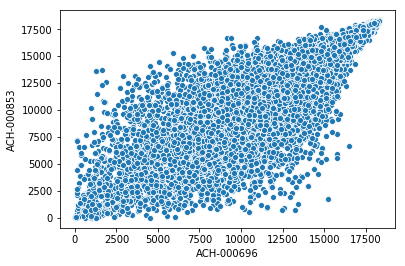

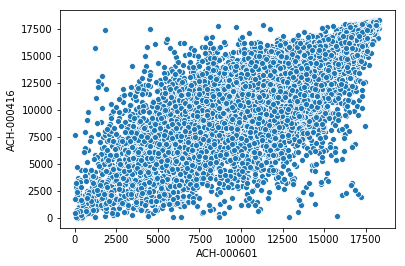

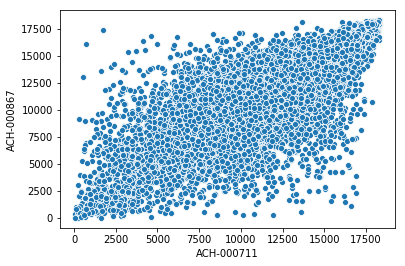

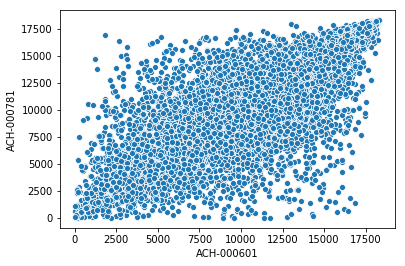

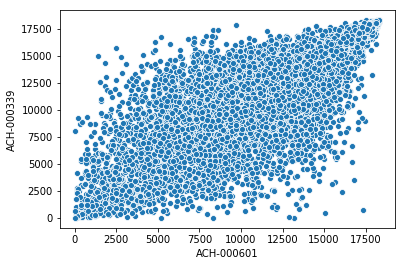

In [78]:
for index, row in top_5.iterrows():
    plt.figure()
    ax = sns.scatterplot(ranks[row['#SOURCE_Cell_Line']],ranks[row['#TARGET_Cell_Line']])

In [79]:
drugs = pd.read_csv('data/listofdrugs.csv')

In [82]:
list(ranks.index)

['A1CF (29974)',
 'A3GALT2 (127550)',
 'A4GALT (53947)',
 'AAAS (8086)',
 'AACS (65985)',
 'AAK1 (22848)',
 'AAMDC (28971)',
 'AAMP (14)',
 'AANAT (15)',
 'AAR2 (25980)',
 'AARD (441376)',
 'AARS (16)',
 'AARS2 (57505)',
 'AARSD1 (80755)',
 'AASDHPPT (60496)',
 'AATF (26574)',
 'AATK (9625)',
 'ABAT (18)',
 'ABCA12 (26154)',
 'ABCA13 (154664)',
 'ABCA2 (20)',
 'ABCA4 (24)',
 'ABCA5 (23461)',
 'ABCA8 (10351)',
 'ABCB10 (23456)',
 'ABCB4 (5244)',
 'ABCB5 (340273)',
 'ABCB6 (10058)',
 'ABCB7 (22)',
 'ABCB9 (23457)',
 'ABCC1 (4363)',
 'ABCC10 (89845)',
 'ABCC3 (8714)',
 'ABCC6 (368)',
 'ABCD1 (215)',
 'ABCD3 (5825)',
 'ABCD4 (5826)',
 'ABCE1 (6059)',
 'ABCF1 (23)',
 'ABCF2 (10061)',
 'ABCG1 (9619)',
 'ABCG8 (64241)',
 'ABHD11 (83451)',
 'ABHD12 (26090)',
 'ABHD12B (145447)',
 'ABHD13 (84945)',
 'ABHD14A (25864)',
 'ABHD15 (116236)',
 'ABHD16A (7920)',
 'ABHD17A (81926)',
 'ABHD18 (80167)',
 'ABHD2 (11057)',
 'ABHD3 (171586)',
 'ABI1 (10006)',
 'ABI3 (51225)',
 'ABL1 (25)',
 'ABLIM1 (3983)'

In [97]:
drugs['genes_list']=[list(filter(None, x.split('|'))) for x in drugs['genes']]

In [136]:
gene_targets = pd.DataFrame(columns=['genes','drug'])

In [137]:
for index, row in drugs.iterrows():
    targets = []
    for gene in row['genes_list']:
        targets.extend(list(filter(lambda x: gene in x, list(ranks.index))))
    gene_targets = gene_targets.append({'genes':targets,'drug':row['drug_name']},ignore_index=True)

In [138]:
gene_targets.to_csv('data/gene_targets.csv')

In [140]:
gene_targets

,genes,drug
0,"[ESR1 (2099), ESR2 (2100)]",GDC0810
1,"[BTAF1 (9044), TAF1 (6872), TAF10 (6881), TAF1...",TAF1_5496
2,[XIAP (331)],AZD5582
3,"[BRD2 (6046), BRD4 (23476), BRDT (676)]",JQ1
4,[MCL1 (4170)],AZD5991
5,"[MET (4233), METAP1 (23173), METAP2 (10988), M...",Savolitinib
6,"[CDK4 (1019), CDK6 (1021)]",Ribociclib
7,[MDM2 (4193)],Nutlin-3a (-)
8,[BIRC5 (332)],Sepantronium bromide
9,[ESR1 (2099)],Tamoxifen


In [122]:
targetable = []
for g in gene_targets['gene']:
    targetable.extend(g)

In [142]:
f=open('data/targetable.list','w')
l=','.join(targetable)
f.write(l)
f.close()

In [ ]:
plt.figure()
ax = sns.scatterplot(ranks[row['#SOURCE_Cell_Line']],ranks[row['#TARGET_Cell_Line']])

In [ ]:
ranks['ACH-000696'],ranks['ACH-000853']

In [132]:
cell_line_to_cancer_type = dict(zip(nodes['DepMap_ID'], nodes['Primary Disease']))

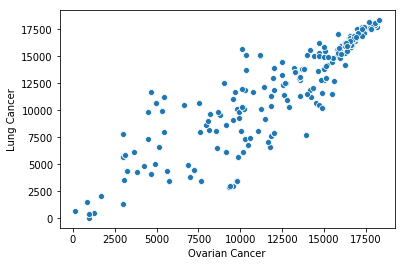

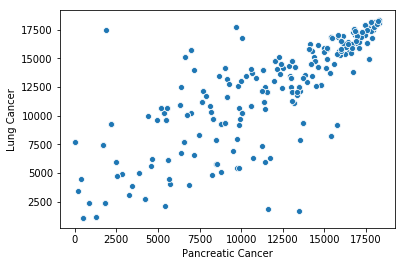

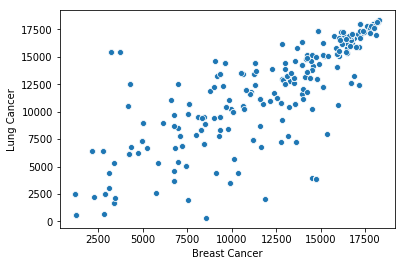

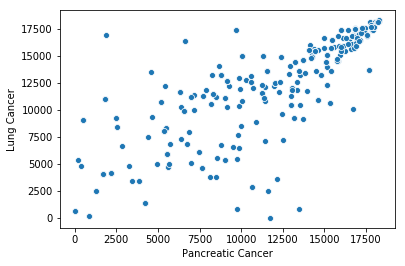

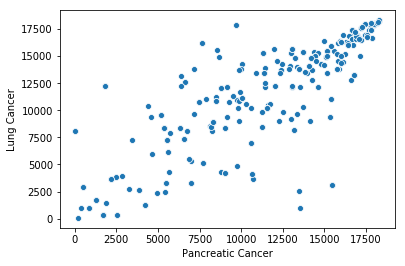

In [134]:
for index, row in top_5.iterrows():
    src = row['#SOURCE_Cell_Line']
    tgt = row['#TARGET_Cell_Line']
    plt.figure()
    shared_targets = ranks.filter([src,tgt]).filter(targetable, axis=0)
    ax = sns.scatterplot(shared_targets[src],shared_targets[tgt])
    ax.set(xlabel=cell_line_to_cancer_type[src], ylabel=cell_line_to_cancer_type[tgt])
    plt.show()